## Classification with Keras

In [45]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [7]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [29]:
model = keras.models.Sequential() # A simple model with a single stack of layers connected sequentially

model.add(keras.layers.Flatten(input_shape=[28,28])) #preprocessing layer with no weights
model.add(keras.layers.Dense(300, activation="relu")) #300 neuron hidden layer
model.add(keras.layers.Dense(100, activation="relu")) #100 neuron hidden layer
model.add(keras.layers.Dense(10, activation="softmax")) #output layer


/Users/arjuns/Downloads/cnn/jupyter_env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [32]:
hidden1 = model.layers[1]

In [33]:
hidden1.name

'dense_6'

In [36]:
model.get_layer('dense_6') is hidden1

True

In [37]:
weights, biases = hidden1.get_weights()

In [38]:
weights

array([[ 0.01369861,  0.03904629, -0.06316976, ..., -0.04993263,
        -0.00098307,  0.00176715],
       [-0.05238421, -0.06011752, -0.00012331, ..., -0.02623556,
        -0.05024871,  0.01848249],
       [-0.02120378,  0.06801578, -0.02751739, ..., -0.04499799,
        -0.01596253,  0.0211856 ],
       ...,
       [-0.03117077,  0.07018673,  0.04182842, ...,  0.02090014,
        -0.06800564,  0.06077462],
       [-0.05356357,  0.01923268,  0.01631102, ...,  0.03564929,
         0.02281008,  0.07162531],
       [-0.01664822, -0.05819824,  0.01889076, ...,  0.07310905,
         0.06390479,  0.00358945]], dtype=float32)

In [39]:
weights.shape

(784, 300)

In [40]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7016 - loss: 0.9699 - val_accuracy: 0.8204 - val_loss: 0.5158
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8235 - loss: 0.5065 - val_accuracy: 0.8488 - val_loss: 0.4468
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8398 - loss: 0.4544 - val_accuracy: 0.8562 - val_loss: 0.4138
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8513 - loss: 0.4193 - val_accuracy: 0.8612 - val_loss: 0.4030
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.3955 - val_accuracy: 0.8602 - val_loss: 0.3955
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8654 - loss: 0.3788 - val_accuracy: 0.8704 - val_loss: 0.3769
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8710 - loss: 0.3645 - val_accuracy: 0.8732 - val_loss: 0.3663
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3552 - 

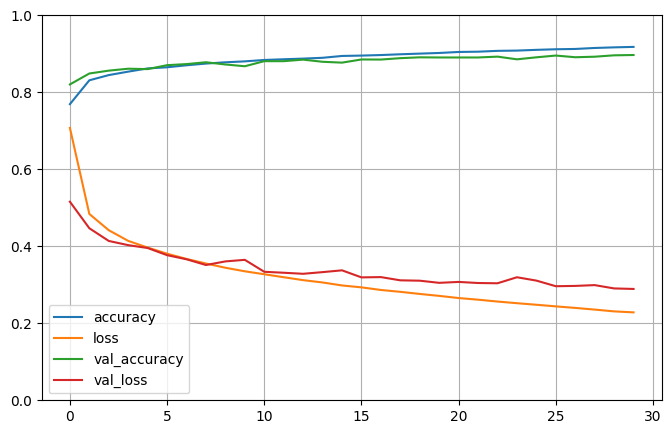

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8458 - loss: 62.3760


[64.7114028930664, 0.8438000082969666]

## Regression with Keras

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test_full)


In [48]:
X_train.shape, X_val.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [54]:
model = keras.models.Sequential([
            keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
            keras.layers.Dense(1)
        ])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 1.4491 - val_loss: 0.5370
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.5798 - val_loss: 0.4404
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.4748 - val_loss: 0.4159
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4492 - val_loss: 0.4265
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.4507 - val_loss: 0.4345
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.4322 - val_loss: 0.4549
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.4335 - val_loss: 0.5167
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.4190 - val_loss: 0.5597
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.4032 - val_loss: 0.6604
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4342 - val_loss: 0.6723
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.4125 - val_loss: 0.7860
Epoch 12/20
363/363 ━━━━━━━━━━

In [55]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 2.3408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<Axes: >

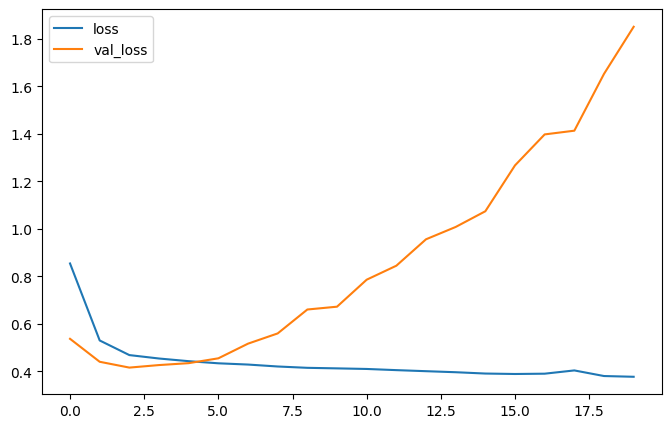

In [56]:
pd.DataFrame(history.history).plot(figsize=(8,5))

### Alternative architectures

![scorefunctions](../assets/reg_arch_1.png "scorefunctions")

In [65]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [66]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [67]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
210/363 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 1.6456 

/Users/arjuns/Downloads/cnn/jupyter_env/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_49']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 1.8642 - val_loss: 0.7159
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 3.0795 - val_loss: 6.1133
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.5773 - val_loss: 2.7930
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.4333 - val_loss: 1.6783
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.3947 - val_loss: 1.5385
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.3715 - val_loss: 1.3023
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.3589 - val_loss: 1.1236
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.3725 - val_loss: 1.0174
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.3703 - val_loss: 0.9558
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.3445 - val_loss: 0.9429
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3646 - val_loss: 0.9032
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

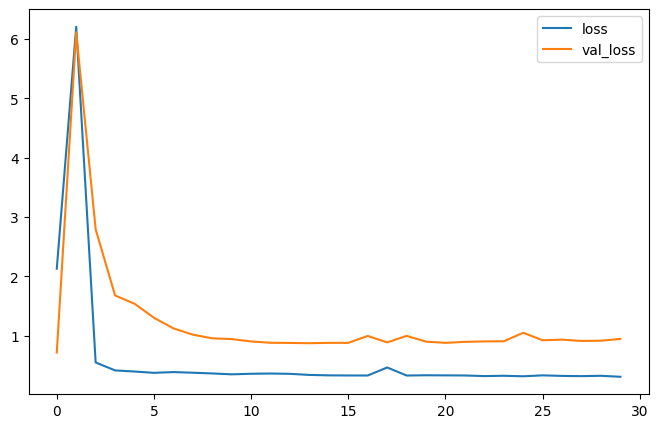

In [68]:
pd.DataFrame(history.history).plot(figsize=(8,5))

![scorefunctions](../assets/reg_arch_2.png "scorefunctions")

In [69]:
input_A = keras.Input(shape=[5], name="wide_input")
input_B = keras.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [73]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [74]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=30, validation_data=((X_val_A, X_val_B), y_val))

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0722 - val_loss: 1.2023
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.9368 - val_loss: 0.8426
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.7072 - val_loss: 0.7440
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.6349 - val_loss: 0.7005
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.6299 - val_loss: 0.6752
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.5970 - val_loss: 0.6512
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.5801 - val_loss: 0.6366
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.5706 - val_loss: 0.6179
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.5646 - val_loss: 0.6081
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.5591 - val_loss: 0.5953
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.5392 - val_loss: 0.5871
Epoch 12/30
363/363 ━━━━━━━━━━━━

<Axes: >

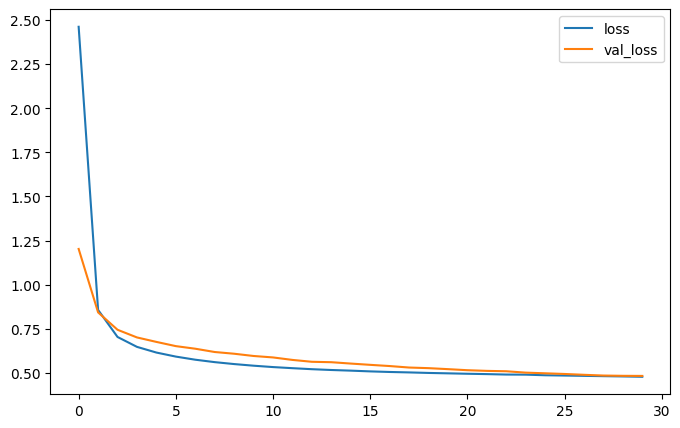

In [76]:
pd.DataFrame(history.history).plot(figsize=(8, 5))